In [1]:
#Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# csv_file pathing
fertility_rate_path = "Resource/fred_fertility_rates.csv"
living_arrangements_path = "Resource/census_living_arrangements.csv"
marital_status_path = "Resource/marital status overtime.csv"
age_fertility_path = "Resource/Age_Fertility.csv"
education_path = "Resource/Female Education Attainment Level.csv"


In [3]:
# Raw DataFrame Prep: Fertility Rates

fertility_rate_df = pd.read_csv(fertility_rate_path).dropna()
fertility_rate_df['DATE'] = pd.to_datetime(fertility_rate_df['DATE'].str.strip(), format='%d/%m/%Y').dt.year
fertility_rate_df.rename(columns = {'SPDYNTFRTINUSA':'fertility_rate','DATE':'Year'}, inplace = True) 

print(f'{len(fertility_rate_df)} records')
fertility_rate_df.head()

# Print to csv - remove hashmark in front of below code to export to csv
# fertility_rate_df.to_csv("Output/fertility_rate.csv", index=False, header=True)


59 records


,Year,fertility_rate
0,1960,3.654
1,1961,3.620
2,1962,3.461
3,1963,3.319
4,1964,3.190


In [4]:
# Raw DataFrame Prep: Living Arrangements

# Read csv, drop na
living_arrangements_df = pd.read_csv(living_arrangements_path).dropna()

# Merge with fertility rates
merge_living_df = pd.merge(fertility_rate_df, living_arrangements_df, on="Year", how="outer")

# Print and display
print(f'{len(merge_living_df)} records')
merge_living_df.head()

# Print to csv - remove hashmark in front of below code to export to csv
# merge_living_df.to_csv("Output/living_arrangements.csv", index=False, header=True)

60 records


,Year,fertility_rate,under_18,two_parents,mother_only,father_only,other_relatives,non_relatives
0,1960,3.654,63727.0,55877.0,5105.0,724.0,1601.0,420.0
1,1961,3.620,NaN,NaN,NaN,NaN,NaN,NaN
2,1962,3.461,NaN,NaN,NaN,NaN,NaN,NaN
3,1963,3.319,NaN,NaN,NaN,NaN,NaN,NaN
4,1964,3.190,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Raw DataFrame Prep: Marital Status

# Read csv, drop na
marital_status_df = pd.read_csv(marital_status_path).dropna()

# Merge with fertility rates
merge_marital_df = pd.merge(fertility_rate_df, marital_status_df, on="Year", how="outer")

# Print and display
print(f'{len(merge_marital_df)} records')
merge_marital_df.head()

# Print to csv - remove hashmark in front of below code to export to csv
# merge_marital_df.to_csv("Output/marital_status.csv", index=False, header=True)

61 records


,Year,fertility_rate,Men Total,Married Men,Unmarried Men Total,Never Married Men,Widowed Men,Divorced Men,Women Total,Married Women,Unmarried Women Total,Never Married Women,Widowed Women,Divorced Women
0,1960,3.654,"60,273","41,781","18,492","15,274","2,112","1,106","64,607","42,583","22,024","12,252","8,064","1,708"
1,1961,3.620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1962,3.461,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1963,3.319,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1964,3.190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


73 records


<ipython-input-6-460f4861a149>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_merge['35 +'] = ages_35_49
<ipython-input-6-460f4861a149>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_merge['34 and below'] = ages_15_30


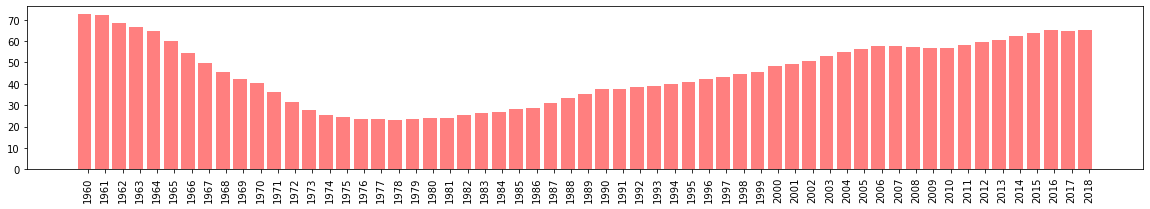

In [6]:
# Raw DataFrame Prep: Fertility by Age

# Read csv
age_fertility_df = pd.read_csv(age_fertility_path)

# Clean
age_fertility_df = age_fertility_df[['Year', 'Age 10-14 Years', 'Age 15-19 Years', 'Age 20-24 Years',
                           'Age 25-29 Years', 'Age 30-34 Years', 'Age 35-39 Years', 'Age 40-44 Years', 'Age 45-49 Years']]

# Merge with fertility rates
merge_age_df = pd.merge(fertility_rate_df, age_fertility_df, on="Year", how="outer")

# Print and display
print(f'{len(merge_age_df)} records')

#Summing up age groups and storing into variable
ages_15_30 = merge_age_df["Age 15-19 Years"] + merge_age_df["Age 20-24 Years"] + merge_age_df["Age 25-29 Years"] + merge_age_df["Age 30-34 Years"]
ages_35_49 = merge_age_df['Age 35-39 Years'] + merge_age_df["Age 40-44 Years"] + merge_age_df["Age 45-49 Years"]

new_merge = merge_age_df.dropna()
new_merge['35 +'] = ages_35_49
new_merge['34 and below'] = ages_15_30
below_34 = new_merge['34 and below']
new_table = new_merge[['Year','fertility_rate', '35 +', '34 and below']]
min_amount = new_table['35 +'].min()
max_amount = new_merge['35 +'].max()

x_axis = np.arange(len(new_table))
tick_locations = [value+0.6 for value in x_axis]
plt.figure(figsize=(20, 3))
plt.bar(x_axis, new_table['35 +'], color='r', alpha=0.5, align='edge')
plt.xticks(tick_locations, round(new_table['Year']), rotation='vertical')
plt.savefig('Bar_chart_35+.png')

# plt.title("Fertility rate from 1960-2018, 35 and older")
# plt.xlabel('Year')
# plt.ylabel('Sum of 35 and olde fertility rate for that year')
# plt.show()

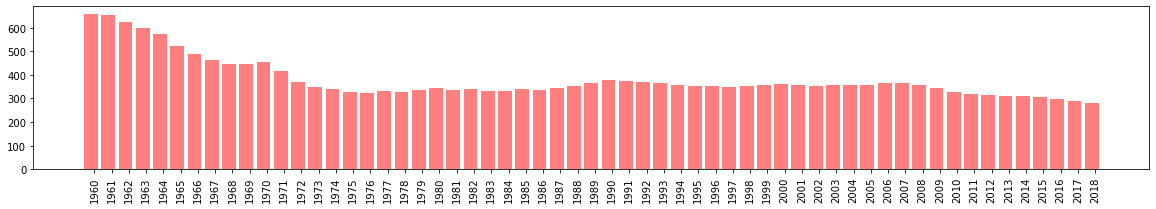

In [7]:
x_axis = np.arange(len(new_table))
tick_locations = [value+0.6 for value in x_axis]
plt.figure(figsize=(20, 3))
plt.bar(x_axis, new_table['34 and below'], color='r', alpha=0.5, align='edge')
plt.xticks(tick_locations, round(new_table['Year']), rotation='vertical')
plt.savefig('Bar_chart_34_and_below.png')

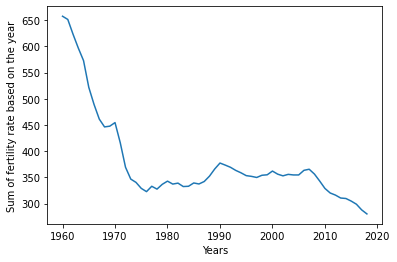

In [8]:
plt.plot(new_merge["Year"], new_merge["34 and below"])
plt.xlabel("Years")
plt.ylabel("Sum of fertility rate based on the year")
plt.savefig('Fertility_rate_34_and_below.png')
plt.show()


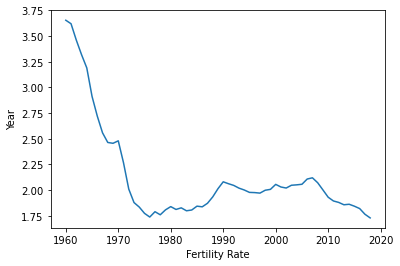

In [9]:
plt.plot(new_merge['Year'], new_merge['fertility_rate'])
plt.xlabel('Fertility Rate')
plt.ylabel('Year')
plt.savefig('Fertility_rate_and_year.png')
plt.show()


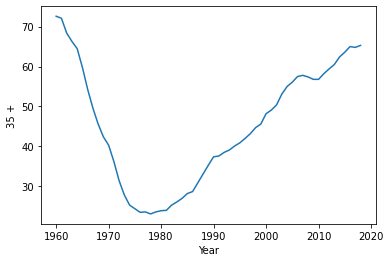

In [10]:
plt.plot(new_merge['Year'], new_merge['35 +'])
plt.xlabel('Year')
plt.ylabel('35 +')
plt.savefig('fertility_rate_35+')
plt.show()
